# 2. Linear Regression
***

- Multiple linear regression differs from the simple one because it can handle multiple input features
- It is a simple algorithm initially developed in the field of statistics and was studied as a model for understanding the relationship between input and output variables
- It is a linear model - assumes linear relationship between input variables (X) and the output variable (y)
- Used to predict continious values (e.g., weight, price...)


#### Assumptions
1. **Linear Assumption** — model assumes the relationship between variables is linear
2. **No Noise** — model assumes that the input and output variables are not noisy — so remove outliers if possible
3. **No Collinearity** — model will overfit when you have highly correlated input variables
4. **Normal Distribution** — the model will make more reliable predictions if your input and output variables are normally distributed. If that’s not the case, try using some transforms on your variables to make them more normal-looking
5. **Rescaled Inputs** — use scalers or normalizer to make more reliable predictions

#### Take-home point
- Training a linear regression model means calculating the best coefficients for the line equation formula
- The best coefficients can be obtained with **gradient descent**
    - An iterative optimization algorithm that calculates derivatives wrt. each coefficient, and updates the coefficients on the go
    - One additional parameter - *learning rate*, specifies the rate at which coefficients are updated
        - High learning rate can lead to "missing" the best values
        - Low learning rate can lead to slow optimization

<br>

## Math behind
- In a nutshell, we need to calculate an array of weights and a single bias through gradient descent
- Weights = slopes, bias = y intercept
- We're still solving a simple line equation:

$$ \large \hat{y} = wx + b $$

<br>

- We also need a **cost function**
    - Function we want to minimize
    - Reducing the cost (loss) leads to better equation parameters
    - We'll choose Mean Squared Error (MSE), but feel free to work with any other

$$ \large MSE = \frac{1}{N} \sum_{i=1}^{n} ((y_i - \hat{y})^2 $$

<br>

- $ \hat{y} $ can be further written into:

$$ \large MSE = \frac{1}{N} \sum_{i=1}^{n} ((y_i - (wx_i + b))^2 $$

<br>

- To update weights and biases, we're using gradient descent
- It relies on partial derivatives calculation for each parameter
- Below you'll find derived MSE wrt. each parameter:

$$ \large \partial_w = \frac{1}{N} \sum_{i=1}^{n} 2x_i(\hat{y} - y) $$
<br>
$$ \large \partial_b = \frac{1}{N} \sum_{i=1}^{n} 2(\hat{y} - y) $$

<br>

- This $ 2 $ can be ommited, or you can leave it - it's not important
- Next, we're updating the existing weights and bias according to the following formulas:

$$ \large w = w - \alpha \cdot \partial_w $$
<br>
$$ \large b = b - \alpha \cdot \partial_b $$

- Where $ \alpha $ is the learning rate
- This process is then repeated for a predefined number of iterations
- Let's see this in action

<br>

## Implementation
- You'll need only Numpy to implement the logic
- Matplotlib is used for optional visualizations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (14, 7)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

<br>

- The `LinearRegression` class is written to follow the familiar Scikit-Learn syntax
- The coefficients are set to `None` at the start - `__init__()` method
- We're also keeping track of the loss (just for visualization purposes)
- The `fit()` method calculates the coefficients
- The `predict()` method essentially implements the line equation
- The `_mean_squared_error()` private function is used to calculate loss at every iteration

In [2]:
class LinearRegression:
    '''
    A class which implements linear regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.01, n_iterations=10000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
        
    @staticmethod
    def _mean_squared_error(y, y_hat):
        '''
        Private method, used to evaluate loss at each iteration.
        
        :param: y - array, true values
        :param: y_hat - array, predicted values
        :return: float
        '''
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
        return error / len(y)
    
    def fit(self, X, y):
        '''
        Used to calculate the coefficient of the linear regression model.
        
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize weights and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            # Line equation
            y_hat = np.dot(X, self.weights) + self.bias
            loss = self._mean_squared_error(y, y_hat)
            self.loss.append(loss)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
        
        
    def predict(self, X):
        '''
        Makes predictions using the line equation.
        
        :param X: array, features
        :return: array, predictions
        '''
        return np.dot(X, self.weights) + self.bias

<br>

## Testing
- We'll use the *diabetes* dataset from Scikit-Learn:

In [3]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
X = data.data
y = data.target

- The below code cell applies train/test split to the dataset:

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- You can now initialize and train the model, and afterwards make predictions:

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

- These are the "optimal" weights:

In [6]:
model.weights

array([  57.01554737,  -44.13781863,  269.89143674,  192.64514651,
         27.72222515,    2.18960209, -147.70003766,  136.38206323,
        224.11121915,  134.72758341])

- And this is the "optimal" bias:

In [7]:
model.bias

152.2631135652031

<br>

## Loss Evaluation

- Let's visualize the loss at each iteration
- Ideally, we should see a curve that starts high and soon drops to zero or near zero:

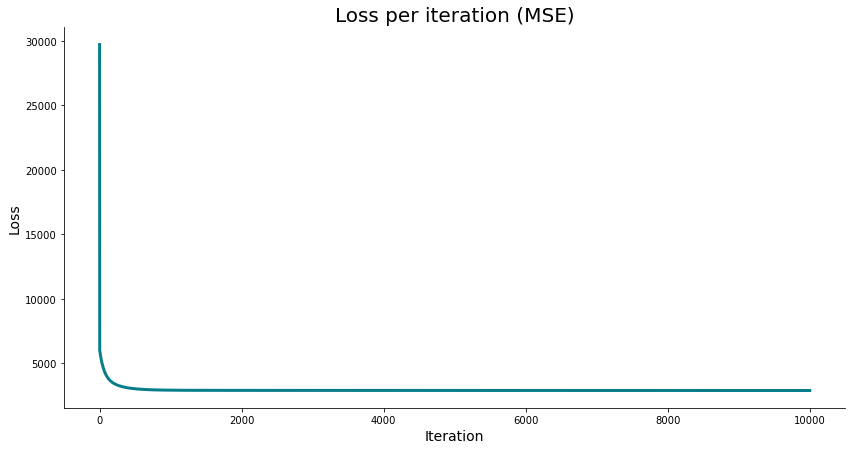

In [15]:
xs = np.arange(len(model.loss))
ys = model.loss

plt.plot(xs, ys, lw=3, c='#087E8B')
plt.title('Loss per iteration (MSE)', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.savefig('images/002_LinearRegression_loss1.png', dpi=300, bbox_inches='tight')
plt.show()

- But how do we know we've used good learning rate?
- You can evaluate it by trying out a couple, and keeping track of the loss:

In [9]:
losses = {}
for lr in [0.5, 0.1, 0.01, 0.001]:
    model = LinearRegression(learning_rate=lr)
    model.fit(X_train, y_train)
    losses[f'LR={str(lr)}'] = model.loss

- You can now visualize loss at each iteration for these different learning rates:

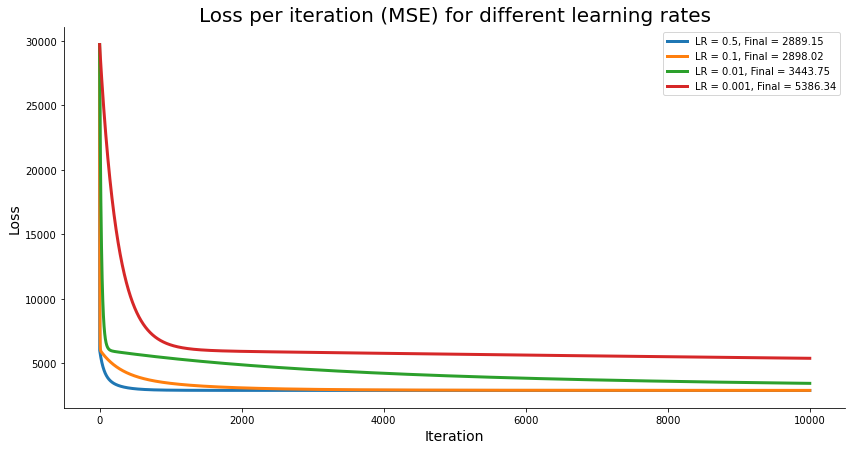

In [16]:
xs = np.arange(len(model.loss))

plt.plot(xs, losses['LR=0.5'], lw=3, label=f"LR = 0.5, Final = {losses['LR=0.5'][-1]:.2f}")
plt.plot(xs, losses['LR=0.1'], lw=3, label=f"LR = 0.1, Final = {losses['LR=0.1'][-1]:.2f}")
plt.plot(xs, losses['LR=0.01'], lw=3, label=f"LR = 0.01, Final = {losses['LR=0.01'][-1]:.2f}")
plt.plot(xs, losses['LR=0.001'], lw=3, label=f"LR = 0.001, Final = {losses['LR=0.001'][-1]:.2f}")
plt.title('Loss per iteration (MSE) for different learning rates', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.legend()
plt.savefig('images/002_LinearRegression_loss2.png', dpi=300, bbox_inches='tight')
plt.show()

- Seems like `learning_rate=0.5` works the best
- Let's train the model with it and evalute (print MSE):

In [11]:
model = LinearRegression(learning_rate=0.5)
model.fit(X_train, y_train)
preds = model.predict(X_test)

model._mean_squared_error(y_test, preds)

2885.8431887424276

<br>

## Comparison with Scikit-Learn
- We want to know if our model is good, so let's compare it with `LinearRegression` model from Scikit-Learn

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

mean_squared_error(y_test, lr_preds)

2900.1732878832295

- Our model actually has a marginally better MSE!